# Week 04 Modelling chemistry with computers
## Aim
Give an example how computers are used to solve chemistry problems...

Generic approach from a list of chemical reactions (Mass-action laws) to a set of coupled non-linear equations.
Show how set of equations can be solved using a newton non-linear solver.

Essential concepts:
1. Chemical species which can be formed from a limited number of master species;
2. Total mass of master species needs to be known in order to solve problem
3. Charge balance and how it can be used to determine inital mass of H+
4. log-k values need to be available for all chemical reactions
5. methodology for writing  chemical equations as function of master species
6. equivalance in linking heterogeneous reactions (gas-liquid) and (liquid-solid).
7. equilibrium v.s. non-equilibrium!
8. fixed volume v.s. fixed pressure...

Main example is the CO2-H2O-Calcite system with NaOH to control pH.

## Orchestra as a tool
We will work using a limited set of chemical systems to illustrate the chemical equilibrium concepts the students need to understand.

We setup a default system for Orchestra. Using python we will change the total amounts, gas and liquid volumes.
We will also setup different systems for open and closed systems... 


In [33]:
# Import libraries
import os
import sys
from IPython.utils import capture

import numpy as np
import matplotlib.pyplot as plt
import PyORCHESTRA # here, the ORCHESTRA submodule is imported
import pandas as pd
import seaborn as sns

%matplotlib widget
sns.set()

# Prepare a file to capture PyOrchestra output
capture_file = open("pyorchestra_output.log", "w")

# pyOrchestra is implemented in C++
# Save original stdout file descriptor
original_stdout_fd = sys.stdout.fileno()

# Duplicate original stdout so we can restore it later
saved_stdout_fd = os.dup(original_stdout_fd)





Explain in a step wise approach the following code section
ToDO rename the Orchestra files, update all files so that they are well documented and describe the system

create a version for a fixed pressure infinite volume, a version for variable pressure fixed volume and fixed volume variable pressure.

pyorchestra will be initialize with the correct chemistry file...

explain that InVars are the species used to define the totals. 
explain that OutVars is the list of Orchestra variables that are exported to python for post-processing or necessary for simulation.

Once prinicple problem is known we can create and initialize a pyorchestra object.

## Define chemical system: CO2-Water-Calcite
In order to solve a chemical equilibrium problem with pyOrchestra, we need to define our chemical system first. Orchestra defines this system with a number of text files. The most important one is the so-called chemistry input file. This file is most easily made using the Orchestra GUI which can be accessed by clicking on the orchestrat2023.jar file.

The most convenient approach is to start with a skeleton problem and then adjust the files step by step. 

The example given here, assumes that we solve a heterogeneous equilibrium problem with water in contact with a gas phase. In this case the gas is going to an atmosphere with a fixed partial pressure of $ \mathrm{CO_2}$. For the ambient atmosphere $p_{CO_2} = 400\times10^{-6} \; \mathrm{atm}$, but we can also have a situation where $p_{CO_2} = 3.75 \;\mathrm{atm}$ for a system that makes sparkling Soda water.

Using the Orchestra GUI we need to define a system of the following primary entities:

|Primary entity|Input Variable|Fix log activity|Log activity|Concentration|Phase|Expression|
|--|--|--|--|--|--|--|
|Ar[g]||x|0.0||||
|CO2[g]||x|-3.37||||
|Calcite[s]||||1.0e-9|tot||
|Cl-||x||1.0e-9|tot||
|H|pH||7.0|||H.logact=-pH|
|H2O||x|-0.0||||
|Na+||x||1.0e-9|tot||

Orchestra will use these primary entities, and their initial values to calculate the total elemental composition in the complete system. The fixed log-activties indicate that the total can vary during the simulation, as long as the log-activity condition is maintained. For the gas phase, the totals are calculated using a state equation (i.e. ideal gas law).

We will use this system to further illustrate a number of concepts:
1. This scenario is one where we have a fixed volume of water and gas in equilibrium with Calcite[s]. The only variable that changes is the partial pressure in the gas phase. In this scenario, we expect the total amount of $\mathrm{CO_3^{-2}}$ dissolved in the liquid phase to increase with increasing pressure. As a result, all dissolved species will change due to shifts in the equilibrium reactions. The main change is that Calcite will dissolve, while buffering the pH.

## Initialise pyOrchestra
In this problem we define the chemical system and then we change the gas volume while maintaining the other conditions. We are interested to see how the equilibrium values will change. 

In order to initialise pyOrchestra we need to define how we will pass information from our python code to Orchestra (InVars) and how we expect Orchestra to return the results (OutVars).

To understand this, you have to realize that Orchestra will use the information we pass in InVars to calculate the total elemental composition in the system. With this information Orchestra then solves the equilibrium problem. The return vector contains all information we need for our python problem about how the elements are distributed over the different species in the system. Please note, that Orchestra calculates quite a lot of results and if we need to we can return each and every one of these results.

The process is as follows: 
- The InVars vector is used to calculate the total elemental composition of the chemical system using the primary species defined.
- After calculating the equilibrium, the equilibrium condition is returned in OutVars.

Please note that we do not have to pass pH with InVars because we want Orchestra to calculate the pH for us.


##Scenario: increase CO2-partial gas pressure with fixed water and gas volume and in the presence of Calcite[s] 
To better understand how we can run simulations where we change the compositional state with InVars, we simulate a situation where the partial pressure of $/mathrm{CO_2}[g]$ increases linearly from virtually zero to 1 atm in 201 steps. This is easily implemented in Python: 

We set the InVars to default values for this scenario.
Now we have to re-initialise Orchestra because we are running a scenario using a different chemical system as the example above. This chemical system is defined in chemistry_CO2-Water-Calcite.inp.

In [34]:
# 
InputFile = 'chemistry_CO2-Water-Calcite.inp'
NoCells = 1 #only 1 cell to have a 0-D system 

InVars = np.array(['CO2[g].logact', 'Ar[g].logact', 
                   'Calcite[s].tot',
                   'Na+.tot', 'Cl-.tot',
                   'gasvolume','watervolume'])

OutVars = np.array(['pH', 'H+.con', 'H+.tot', 
                    'Ar[g].logact','Ar[g].tot',
                    'CO2[g].logact', 'CO2[g].con', 'CO2[g].tot', 
                    'CO3-2.tot', 'H2CO3.con', 'HCO3-.con', 'CO3-2.con', 
                    'Na+.con', 'Cl-.con',
                    'Calcite[s].si', 'Ca+2.tot', 'Ca+2.con',
                    'CaHCO3+.con', 'Calcite[s].min',
                    'pressure', 'gasvolume', 'watervolume'])

p = PyORCHESTRA.ORCHESTRA()
p.initialise(InputFile, NoCells, InVars, OutVars)


Reading and expanding calculator new stylechemistry_CO2-Water-Calcite.inp
Scanning file: chemistry_CO2-Water-Calcite.inp
Including file: objects2022.txt
Scanning file: chemistry_CO2-Water-Calcite.inp
Including file: objects2022.txt
Including file: chemistry_CO2-Water-Calcite.inp
Including file: objects2022.txt
0.047 sec.
	Reading variables .... 0.01 s
testing:
7:CO2[g].logact
6:Ar[g].logact
9:Calcite[s].tot
14:Na+.tot
11:Cl-.tot
22:gasvolume
23:watervolume
12:pH
24:H+.con
25:H+.tot
6:Ar[g].logact
26:Ar[g].tot
7:CO2[g].logact
27:CO2[g].con
28:CO2[g].tot
29:CO3-2.tot
30:H2CO3.con
31:HCO3-.con
32:CO3-2.con
33:Na+.con
34:Cl-.con
35:Calcite[s].si
36:Ca+2.tot
37:Ca+2.con
38:CaHCO3+.con
39:Calcite[s].min
40:pressure
22:gasvolume
23:watervolume
Initialise Completed! the following IO parameters will be used:
0 : Node_ID : 0
1 : minTol : 0.001
2 : H2O.logact : 0
3 : I : 0.1
4 : T : 298.15
5 : chargebalance : 0
6 : Ar[g].logact : 0
7 : CO2[g].logact : -3.35
8 : Calcite[s].logact : -15
9 : Calcite

In [35]:
# %%
# Initialize values in InVars vector
# InVars need to contain floats
IN = np.array([np.ones_like(InVars)]).astype(float)

IN[0][np.where(InVars == 'Calcite[s].tot')] = 0.01 # moles
IN[0][np.where(InVars == 'CO2[g].logact')] = -15 # log10 426.5e-6 atm
IN[0][np.where(InVars == 'Ar[g].logact')] = 0.0 # log 10 (1 atm)
IN[0][np.where(InVars == 'Na+.tot')] = 1e-20 # mol/liter (charge balance)
IN[0][np.where(InVars == 'Cl-.tot')] = 1e-20 # charge balance
IN[0][np.where(InVars == 'gasvolume')] = 1 # liter will be changed in scenarion
IN[0][np.where(InVars == 'watervolume')] = 1 # liter



In [36]:
# Run scenario where pCO2 changes from 0 to 1 atm in 21 steps.

# Please note, pyOrchestra cannot work with concentration values that are 0, as it works with 
# logarithms and log(0) does not exist. To circumvent this problem, we assume a concentration of 0 is a
# very small number (1e-15).
pCO2_list = np.linspace(1e-10,5,500)

# Initialize output
# With the scenario defined we know the number of simulations and therefore
# the number of output variables. We initialize a matrix to store all results
all_Res = np.zeros([len(pCO2_list),len(OutVars)])

# We need to initialize a counter so that we can save output to our output matrix.
# Please note Python starts counting with 0.
ii = -1

# loop over scenario
for pCO2 in pCO2_list:
    # the CO2[g] in InVars is defined as CO2[g].logact
    # We need to take the 10log of the pCO2 and pass this to 'CO2[g].logact'
    # change gasvolume in InVars
    IN[0][np.where(InVars == 'CO2[g].logact')] = np.log10(pCO2)
    
    # run ORCHESTRA
    OUT = p.set_and_calculate(IN)
    ii = ii + 1
    all_Res[ii] = OUT[0]

# Create a dataframe from all_Res for scenario 2
Orch_Res_s1 = pd.DataFrame(all_Res,columns=OutVars)


Try a first calculation with iia switched off....
Parsing expressions of chemistry_CO2-Water-Calcite.inp..... 
Optimizing expressions of chemistry_CO2-Water-Calcite.inp..... 0.084 sec.
1729 variables, 4612 expressions, 10 equations.
First calculation was successful!
Repeat calculation with iia switched on..
Switching on: I: 0.1
Switching on: pH: 7
This was successful!!


In [37]:
pd.DataFrame(IN,columns=InVars)

,CO2[g].logact,Ar[g].logact,Calcite[s].tot,Na+.tot,Cl-.tot,gasvolume,watervolume
0,0.69897,0.0,0.01,1.000000e-20,1.000000e-20,1.0,1.0


## Process Output
We expect the chemical species to change in the liquid phase. To illustrate this we make plots of the pH, and the dissolved carbonate species.
Although we do not expect the charge balance to be effected because we dissolve CO2[g], we do want to plot the concentrations of $Na^+$ and $Cl^-$.

Text(0, 0.5, 'gas volume')

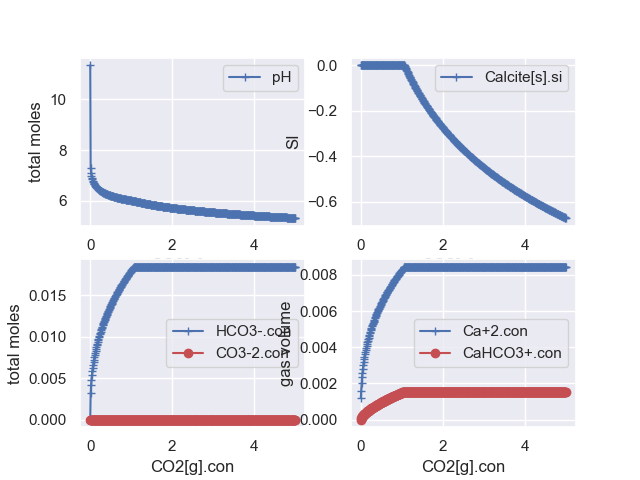

In [38]:
# plotting...
fig,ax = plt.subplots(2,2)

# plot the total moles of CO2[g] in the gas phase
Orch_Res_s1.plot(x='CO2[g].con',y=['pH'],style='b+-',ax=ax[0,0])
Orch_Res_s1.plot(x='CO2[g].con',y=['Calcite[s].si'],style='b+-',ax=ax[0,1])
Orch_Res_s1.plot(x='CO2[g].con',y=['HCO3-.con','CO3-2.con'],style=['b+-','ro-','g^-'],ax=ax[1,0])
Orch_Res_s1.plot(x='CO2[g].con',y=['Ca+2.con','CaHCO3+.con'],style=['b+-','ro-','g^-'],ax=ax[1,1])




ax[0,0].set_ylabel('total moles')
ax[0,1].set_ylabel('SI')
ax[1,0].set_ylabel('total moles')
ax[1,1].set_ylabel('gas volume')


# %%

<Axes: xlabel='pH'>

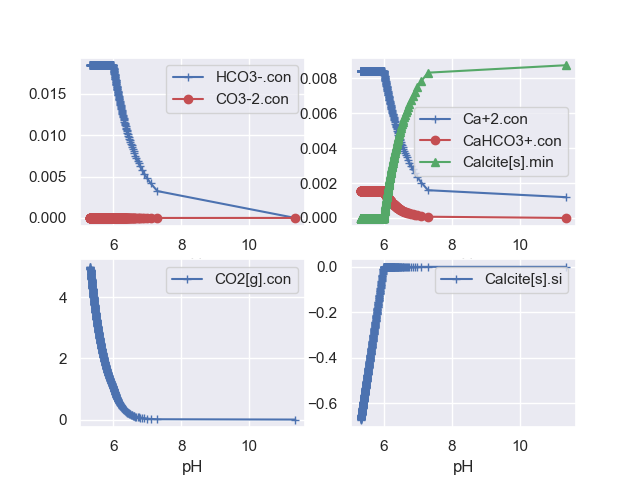

In [39]:
# plotting...
fig,ax = plt.subplots(2,2)

Orch_Res_s1.plot(x='pH',y=['HCO3-.con','CO3-2.con'],style=['b+-','ro-','g^-'],ax=ax[0,0])
Orch_Res_s1.plot(x='pH',y=['Ca+2.con','CaHCO3+.con','Calcite[s].min'],style=['b+-','ro-','g^-'],ax=ax[0,1])

Orch_Res_s1.plot(x='pH',y=['CO2[g].con'],style='b+-',ax=ax[1,0])
Orch_Res_s1.plot(x='pH',y=['Calcite[s].si'],style='b+-',ax=ax[1,1])


In [40]:
# 
InputFile = 'chemistry_CO2-Water-Calcite-pH.inp'
NoCells = 1 #only 1 cell to have a 0-D system 

InVars = np.array(['pH', 
                   'CO2[g].tot', 'Ar[g].logact', 
                   'Calcite[s].tot',
                   'Na+.tot', 'Cl-.tot',
                   'gasvolume','watervolume'])

OutVars = np.array(['pH', 'H+.con', 'H+.tot', 
                    'Ar[g].logact','Ar[g].tot',
                    'CO2[g].logact', 'CO2[g].con', 'CO2[g].tot', 
                    'CO3-2.tot', 'H2CO3.con', 'HCO3-.con', 'CO3-2.con', 
                    'Na+.con', 'Cl-.con',
                    'Calcite[s].si', 'Ca+2.tot', 'Ca+2.con',
                    'CaHCO3+.con', 'Calcite[s].min',
                    'pressure', 'gasvolume', 'watervolume'])

p = PyORCHESTRA.ORCHESTRA()
p.initialise(InputFile, NoCells, InVars, OutVars)


Reading and expanding calculator new stylechemistry_CO2-Water-Calcite-pH.inp
Scanning file: chemistry_CO2-Water-Calcite-pH.inp
Including file: objects2022.txt
Scanning file: chemistry_CO2-Water-Calcite-pH.inp
Including file: objects2022.txt
Including file: chemistry_CO2-Water-Calcite-pH.inp
Including file: objects2022.txt
0.022 sec.
	Reading variables .... 0.01 s
testing:
11:pH
7:CO2[g].tot
5:Ar[g].logact
9:Calcite[s].tot
21:Na+.tot
22:Cl-.tot
23:gasvolume
24:watervolume
11:pH
25:H+.con
26:H+.tot
5:Ar[g].logact
27:Ar[g].tot
6:CO2[g].logact
28:CO2[g].con
7:CO2[g].tot
29:CO3-2.tot
30:H2CO3.con
31:HCO3-.con
32:CO3-2.con
33:Na+.con
34:Cl-.con
35:Calcite[s].si
36:Ca+2.tot
37:Ca+2.con
38:CaHCO3+.con
39:Calcite[s].min
40:pressure
23:gasvolume
24:watervolume
Initialise Completed! the following IO parameters will be used:
0 : Node_ID : 0
1 : minTol : 0.001
2 : H2O.logact : 0
3 : I : 0.1
4 : T : 298.15
5 : Ar[g].logact : 0
6 : CO2[g].logact : -15
7 : CO2[g].tot : 1e-09
8 : Calcite[s].logact : -1

In [41]:
# %%
# Initialize values in InVars vector
# InVars need to contain floats
IN = np.array([np.ones_like(InVars)]).astype(float)

IN[0][np.where(InVars == 'pH.tot')] = 4 # moles
IN[0][np.where(InVars == 'Calcite[s].tot')] = 0.01 # moles
IN[0][np.where(InVars == 'CO2[g].logact')] = -15 # log10 426.5e-6 atm
IN[0][np.where(InVars == 'Ar[g].logact')] = 0.0 # log 10 (1 atm)
IN[0][np.where(InVars == 'Na+.tot')] = 1e-20 # mol/liter (charge balance)
IN[0][np.where(InVars == 'Cl-.tot')] = 1e-20 # charge balance
IN[0][np.where(InVars == 'gasvolume')] = 1 # liter will be changed in scenarion
IN[0][np.where(InVars == 'watervolume')] = 1 # liter



In [42]:
# Run scenario where pCO2 changes from 0 to 1 atm in 21 steps.

# Please note, pyOrchestra cannot work with concentration values that are 0, as it works with 
# logarithms and log(0) does not exist. To circumvent this problem, we assume a concentration of 0 is a
# very small number (1e-15).
pH_list = np.linspace(13,1,49)

# Initialize output
# With the scenario defined we know the number of simulations and therefore
# the number of output variables. We initialize a matrix to store all results
all_Res = np.zeros([len(pH_list),len(OutVars)])

# We need to initialize a counter so that we can save output to our output matrix.
# Please note Python starts counting with 0.
ii = -1

# loop over scenario
for pH in pH_list:
    # the CO2[g] in InVars is defined as CO2[g].logact
    # We need to take the 10log of the pCO2 and pass this to 'CO2[g].logact'
    # change gasvolume in InVars
    IN[0][np.where(InVars == 'pH')] = pH
    
    # run ORCHESTRA
    OUT = p.set_and_calculate(IN)
    ii = ii + 1
    all_Res[ii] = OUT[0]

# Create a dataframe from all_Res for scenario 2
Orch_Res_s1 = pd.DataFrame(all_Res,columns=OutVars)


Try a first calculation with iia switched off....
Parsing expressions of chemistry_CO2-Water-Calcite-pH.inp..... 
Optimizing expressions of chemistry_CO2-Water-Calcite-pH.inp..... 0.05 sec.
1731 variables, 4613 expressions, 10 equations.
First calculation was successful!
Repeat calculation with iia switched on..
Switching on: I: 0.1
This was successful!!


Text(0.5, 0, 'pH')

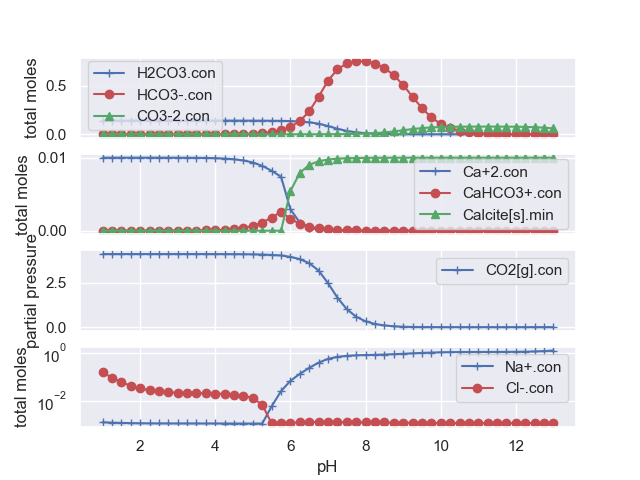

In [46]:
# plotting...
fig,ax = plt.subplots(4,1,sharex=True)

# plot the total moles of CO2[g] in the gas phase
Orch_Res_s1.plot(x='pH',y=['H2CO3.con','HCO3-.con','CO3-2.con'],style=['b+-','ro-','g^-','m*-','y.-'],ax=ax[0])
Orch_Res_s1.plot(x='pH',y=['Ca+2.con', 'CaHCO3+.con','Calcite[s].min'],style=['b+-','ro-','g^-','m*-','y.-'],ax=ax[1])
Orch_Res_s1.plot(x='pH',y=['CO2[g].con'],style=['b+-','ro-','g^-','m*-'],ax=ax[2])

# plot the total moles of CO3-2 in the liquid phase
Orch_Res_s1.plot(x='pH',y=['Na+.con','Cl-.con'],style=['b+-','ro-','g^-'],ax=ax[3])

ax[0].set_ylabel('total moles')
ax[1].set_ylabel('total moles')
ax[2].set_ylabel('partial pressure')
ax[3].set_ylabel('total moles')
ax[3].set_yscale('log')
ax[3].set_xlabel('pH')


# %%